In [ ]:
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 6.29MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 59.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.5MB/s]


In [ ]:
%ls

drive/  gender_submission.csv  kaggle.json  sample_data/  test.csv  train.csv


# Load Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
traindf = pd.read_csv("/content/train.csv")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
testdf = pd.read_csv("/content/test.csv")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Preprocessing

In [ ]:
print(f"{traindf.duplicated().sum()}\n"  f"{testdf.duplicated().sum()}")

0
0


In [ ]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
med = traindf["Age"].median()
traindf["Age"] = traindf["Age"].fillna(med)
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
most = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(most)
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
testdf["Age"] = testdf["Age"].fillna(med)
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
testdf["Embarked"] = testdf["Embarked"].fillna(most)
testdf["Fare"] = testdf["Fare"].fillna(traindf["Fare"].median())
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
traindf = pd.get_dummies(traindf, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
traindf

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,1,0,0


In [ ]:
testdf = pd.get_dummies(testdf, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
testdf

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,1,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,NaN,0,1,1,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1,0,1
416,1308,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,NaN,0,1,1,0,1


In [ ]:
name = traindf["Name"].apply(lambda x : x.split(",")[-1].split(".")[0].strip())
pd.crosstab(traindf["Survived"], name)

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [ ]:
def trans_name(x):
    mid_name = x.split(",")[-1].split(".")[0].strip()
    if mid_name == "Mr":
        return "Mr"
    elif mid_name == "Mrs":
        return "Mrs"
    elif mid_name == "Miss":
        return "Miss"
    elif mid_name == "Ms" or mid_name == "Lady" or mid_name == "Countess":
        return "Mrs"
    else:
        return "Throw"


In [ ]:
traindf["Name"] = traindf["Name"].apply(trans_name)
traindf = pd.get_dummies(traindf, columns=["Name"], drop_first=True)
traindf

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_Mr,Name_Mrs,Name_Throw
0,1,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1,1,0,0
1,2,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,0,1,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,0,0
3,4,1,35.0,1,0,113803,53.1000,C123,0,0,0,0,1,0,1,0
4,5,0,35.0,0,0,373450,8.0500,NaN,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,211536,13.0000,NaN,1,0,1,0,1,0,0,1
887,888,1,19.0,0,0,112053,30.0000,B42,0,0,0,0,1,0,0,0
888,889,0,28.0,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1,0,0,0
889,890,1,26.0,0,0,111369,30.0000,C148,0,0,1,0,0,1,0,0


In [ ]:
testdf["Name"] = testdf["Name"].apply(trans_name)
testdf = pd.get_dummies(testdf, columns=["Name"], drop_first=True)
testdf

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_Mr,Name_Mrs,Name_Throw
0,892,34.5,0,0,330911,7.8292,NaN,0,1,1,1,0,1,0,0
1,893,47.0,1,0,363272,7.0000,NaN,0,1,0,0,1,0,1,0
2,894,62.0,0,0,240276,9.6875,NaN,1,0,1,1,0,1,0,0
3,895,27.0,0,0,315154,8.6625,NaN,0,1,1,0,1,1,0,0
4,896,22.0,1,1,3101298,12.2875,NaN,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,28.0,0,0,A.5. 3236,8.0500,NaN,0,1,1,0,1,1,0,0
414,1306,39.0,0,0,PC 17758,108.9000,C105,0,0,0,0,0,0,0,1
415,1307,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1,0,1,1,0,0
416,1308,28.0,0,0,359309,8.0500,NaN,0,1,1,0,1,1,0,0


In [ ]:
traindf.drop(columns=["PassengerId", "Ticket", "Cabin"], inplace=True)
traindf

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_Mr,Name_Mrs,Name_Throw
0,0,22.0,1,0,7.2500,0,1,1,0,1,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,0,1,0
4,0,35.0,0,0,8.0500,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1,0,0,0
888,0,28.0,1,2,23.4500,0,1,0,0,1,0,0,0
889,1,26.0,0,0,30.0000,0,0,1,0,0,1,0,0


In [ ]:
testdf.drop(columns=["Ticket", "Cabin"], inplace=True)
testdf

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_Mr,Name_Mrs,Name_Throw
0,892,34.5,0,0,7.8292,0,1,1,1,0,1,0,0
1,893,47.0,1,0,7.0000,0,1,0,0,1,0,1,0
2,894,62.0,0,0,9.6875,1,0,1,1,0,1,0,0
3,895,27.0,0,0,8.6625,0,1,1,0,1,1,0,0
4,896,22.0,1,1,12.2875,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,28.0,0,0,8.0500,0,1,1,0,1,1,0,0
414,1306,39.0,0,0,108.9000,0,0,0,0,0,0,0,1
415,1307,38.5,0,0,7.2500,0,1,1,0,1,1,0,0
416,1308,28.0,0,0,8.0500,0,1,1,0,1,1,0,0


In [ ]:
# when preprocessing DataFrame use this to check columns
cat_cols, num_cols = list(), list()
for col in traindf.columns:
    print(f"{col:>11}:{traindf[col].nunique():>4}")
    if traindf[col].nunique() <= 5:
        cat_cols.append(col)
    else:
        num_cols.append(col)
print(f"Categorical:\n{cat_cols}\n"
      f"Numerical:\n{num_cols}")

   Survived:   2
        Age:  88
      SibSp:   7
      Parch:   7
       Fare: 248
   Pclass_2:   2
   Pclass_3:   2
   Sex_male:   2
 Embarked_Q:   2
 Embarked_S:   2
    Name_Mr:   2
   Name_Mrs:   2
 Name_Throw:   2
Categorical:
['Survived', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Name_Mr', 'Name_Mrs', 'Name_Throw']
Numerical:
['Age', 'SibSp', 'Parch', 'Fare']


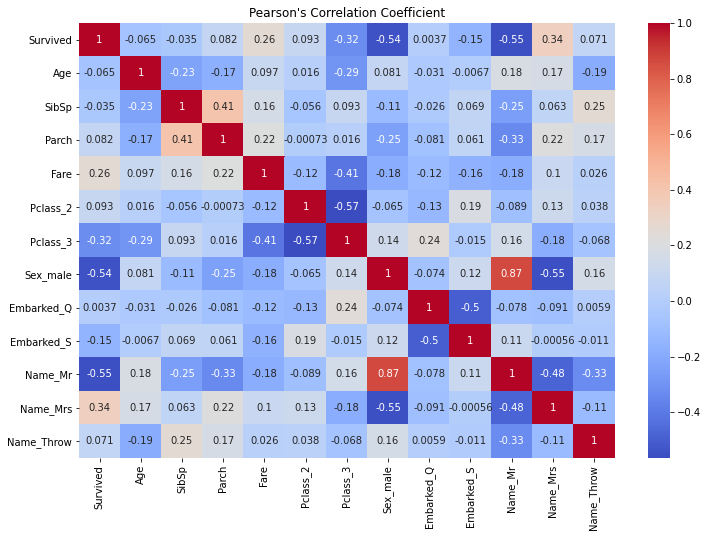

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(traindf.corr(), annot=True ,cmap="coolwarm")
plt.title("Pearson's Correlation Coefficient")
plt.show()

# Machine Learning

In [ ]:
y = traindf["Survived"]
X = traindf.drop(columns="Survived")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(801, 12) (801,) (90, 12) (90,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model1 = KNeighborsClassifier().fit(X, y)
model2 = SVC().fit(X, y)
model3 = MLPClassifier().fit(X, y)
model4 = RandomForestClassifier().fit(X, y)

name_list = ["KNN", "SVC", "DNN", "RF"]
model_list = [model1, model2, model3, model4]

for name, model in zip(name_list, model_list):
    cv_score = cross_val_score(model, X, y, cv=10)
    print(f"{name}:\n\tcv10_Accuracy:{cv_score.mean():5>.3f}")

KNN:
	cv10_Accuracy:0.718
SVC:
	cv10_Accuracy:0.681
DNN:
	cv10_Accuracy:0.776
RF:
	cv10_Accuracy:0.806


In [ ]:
#Use all data to Turn model
knn_param = {"n_neighbors":range(2,9), "weights":["uniform", "distance"]}
svc_param = {"C":[700, 750, 800], "degree":range(1,4), "gamma":["scale", "auto"]}
dnn_param = {"solver":["sgd", "adam"], "learning_rate":["constant", "adaptive"], "warm_start":["True", "False"], "random_state":[0]}
rf_param = {"max_depth":range(3, 6), "n_estimators":range(30, 51), "random_state":[0]}

name_list = ["KNN", "SVC", "DNN", "RandomForest"]
model_list = [KNeighborsClassifier(), SVC(), MLPClassifier(), RandomForestClassifier()]
param_list = [knn_param, svc_param, dnn_param, rf_param]

for name, model, param in zip(name_list, model_list, param_list):
    clf = GridSearchCV(model, param, cv=5).fit(X, y)
    print(f"{name}:\n\t{clf.best_params_}\n\t{clf.best_score_:.3f}")

KNN:
	{'n_neighbors': 8, 'weights': 'distance'}
	0.724
SVC:
	{'C': 750, 'degree': 1, 'gamma': 'scale'}
	0.809
DNN:
	{'learning_rate': 'constant', 'random_state': 0, 'solver': 'adam', 'warm_start': 'True'}
	0.804
RandomForest:
	{'max_depth': 5, 'n_estimators': 31, 'random_state': 0}
	0.828


In [ ]:
result = pd.DataFrame()
result["PassengerId"] = testdf["PassengerId"]

data_test = testdf.drop(columns="PassengerId")

model_list = [KNeighborsClassifier(n_neighbors=8, weights="distance"),
              SVC(kernel="rbf", C=750, degree=1, gamma="scale"),
              MLPClassifier(learning_rate="constant", solver="adam", warm_start=True, random_state=0),
              RandomForestClassifier(max_depth=5, n_estimators=31, random_state=0)]

for name, model in zip(name_list, model_list):
    model.fit(X, y)
    result["Survived"] = model.predict(data_test)
    result.to_csv(f"{name}.csv", encoding="utf-8", index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
truedf = pd.read_csv("gender_submission.csv")
for name in name_list:
    preddf = pd.read_csv(f"{name}.csv")
    y_true = truedf["Survived"]
    y_pred = preddf["Survived"]
    print(f"{name}: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{confusion_matrix(y_true, y_pred)}\n")

KNN: 0.6627
[[200  66]
 [ 75  77]]

SVC: 0.9545
[[249  17]
 [  2 150]]

DNN: 0.9187
[[239  27]
 [  7 145]]

RandomForest: 0.9234
[[248  18]
 [ 14 138]]



In [ ]:
from sklearn.metrics import confusion_matrix
truedf = pd.read_csv("gender_submission.csv")
preddf = pd.read_csv("/content/DNN.csv")
y_true = truedf["Survived"]
y_pred = preddf["Survived"]
confusion_matrix(y_true, y_pred)
print(f"Accuracy：\n\t{accuracy_score(y_true, y_pred):.4f}")

Accuracy：
	0.9187


In [ ]:
from sklearn.metrics import confusion_matrix
truedf = pd.read_csv("gender_submission.csv")
preddf = pd.read_csv("/content/KNN.csv")
y_true = truedf["Survived"]
y_pred = preddf["Survived"]
confusion_matrix(y_true, y_pred)
print(f"Accuracy：\n\t{accuracy_score(y_true, y_pred):.4f}")

Accuracy：
	0.6627


In [ ]:
from sklearn.metrics import confusion_matrix
truedf = pd.read_csv("gender_submission.csv")
preddf = pd.read_csv("/content/SVC.csv")
y_true = truedf["Survived"]
y_pred = preddf["Survived"]
confusion_matrix(y_true, y_pred)
print(f"Accuracy：\n\t{accuracy_score(y_true, y_pred):.4f}")

Accuracy：
	0.9545


In [ ]:
from sklearn.metrics import confusion_matrix
truedf = pd.read_csv("gender_submission.csv")
preddf = pd.read_csv("/content/RandomForest.csv")
y_true = truedf["Survived"]
y_pred = preddf["Survived"]
confusion_matrix(y_true, y_pred)
print(f"Accuracy：\n\t{accuracy_score(y_true, y_pred):.4f}")

Accuracy：
	0.9234


In [ ]:
! kaggle competitions submit -c titanic -f RandomForest.csv -m "RF_2021"

100% 2.77k/2.77k [00:01<00:00, 2.79kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster